In [1]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

In [2]:
%cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas/ActividadesPracticas/Regresion'

[WinError 3] El sistema no puede encontrar la ruta especificada: "'/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas/ActividadesPracticas/Regresion'"
c:\Users\Pc\Desktop\TUPED\Aprendizaje Automatico\Practica\Semana III\AM_Regresion


# Regresión Lineal

Es una técnica de aprendizaje automático que se utiliza para predecir una variable continua (variable dependiente `y`) a partir de una o más variables independientes (características `x`).

Es una subcategoría del Aprendizaje supervisado. A diferencia de la _Clasificación_, donde se predicen etiquetas de clase, en la regresión las salidas son valores numéricos en una escala continua.

### Regresión lineal simple:
En este caso, se modela la relación con una sola característica (única variable de entrada). El modelo propone una recta para describir la relación:

$$\hat{y}=w_0 + w_1x$$

donde:
- $w_0$ es la intersección con el eje $y$.
- $w_1$ es la pendiente de la recta. 

El objetivo es ajustar los coeficientes $w_0$ y $w_1$ para que la recta se acerque lo más posible a los puntos de los datos.

Podemos decir que la regresión lineal consiste en encontrar la recta que mejor se ajusta a los puntos, como se muestra en la siguiente imagen:

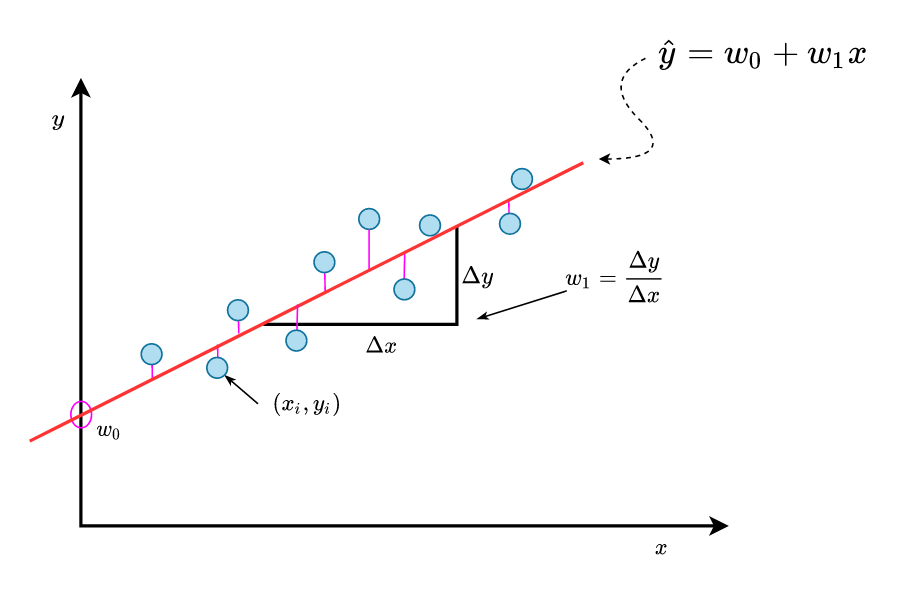

In [3]:
display(Image(filename='./2_imagenes/regresion_lineal.png', width=800))

### Función de pérdida
Para encontrar la función que mejor se ajusta a los puntos de nuestros datos de entrenamiento, usamos una función de pérdida o de Loss que calcula la diferencia entre lo que predice el modelo y el valor "real" de cada ejemplo.

La más usada es el Error Cuadrático Medio (MSE):

$$\mathcal{J}(w_0, w_1) = \frac{1}{2N}\sum\limits_{i=1}^{N}(\hat{y}^{(i)} - y^{(i)})^2$$

donde:
- $N$ es el número de ejemplos de entrenamiento (instancias).
- $\hat{y}^{(i)}$ es la predicción del modelo para el ejemplo $i$.
- $y^{(i)}$ es el valor real para el ejemplo $i$.

El factor $\frac{1}{2}$ se agrega por conveniencia matemática (para que el 2 se cancele al derivar).

### ¿Cómo se entrena el modelo?

Se busca minimizar el error cuadrático medio. Para eso usamos el algoritmo de Descenso de Gradiente, que ajusta los parámetros $w_0$ y $w_1$ en la dirección en la que el error disminuye.

**Gradiente de la función de pérdida**

Si derivamos la función de pérdida respecto a cada parámetro, obtenemos:

$$\frac{\partial \mathcal{J}}{\partial w_0} = \frac{1}{N}\sum_{i=1}^N \big(\hat{y}^{(i)} - y^{(i)}\big)$$

$$\frac{\partial \mathcal{J}}{\partial w_1} = \frac{1}{N}\sum_{i=1}^N \big(\hat{y}^{(i)} - y^{(i)}\big) \, x^{(i)}$$

En el descenso del gradiente para ajustar los parámetros, la idea es actualizarlos en la dirección contraria al sentido en que el gradiente aumenta.

En cada iteración los parámetros se actualizan así:

$$w_0 \leftarrow w_0 - \eta \cdot \frac{\partial \mathcal{J}}{\partial w_0}$$

$$w_1 \leftarrow w_1 - \eta \cdot \frac{\partial \mathcal{J}}{\partial w_1}$$



#### Algoritmo de descenso de gradiente

1. Inicializar los pesos $w_0$, $w_1$ en ceros o aleatoriamente.
2. Para cada iteración (hasta un número máximo de épocas o hasta que el algoritmo converja):
   1. Calcular las predicciones $\hat{y}$ usando los pesos actuales.

        $\hat y=w_0 + w_1x$
   2. Calcular el gradiente de la función de pérdida con respecto a los pesos.
   3. Actualizar los pesos en la dirección contraria del gradiente.

     $$
     w_0 \leftarrow w_0 - \eta \cdot \frac{\partial \mathcal{J}}{\partial w_0}, \quad
     w_1 \leftarrow w_1 - \eta \cdot \frac{\partial \mathcal{J}}{\partial w_1}
     $$
        
   4. Calcular y guardar el valor de la función de pérdida.
3. Retornar los pesos $w_0$, $w_1$ y los valores de la función de pérdida.

### Actividad 1

Usando sklearn, pruebe el algoritmo de regresión con la clase [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Utilice el conjunto de datos del archivo `data_1.txt` de la carpeta `1_datos`. 

Este es un conjunto muy simple que representa el precio de una casa en función de la población de una ciudad. Los datos están escalados en unidades de $10000 para el precio y 10000 para la población. 

Cargar los datos del archivo utilizando la función `loadtxt` de la biblioteca `numpy` especificando el parámetro `delimiter=','`. El archivo tiene 2 columnas que representan la variable independiente y la variable dependiente. Grafíquelos.

Ajuste el modelo con `LinearRegression` y grafique la recta obtenida junto con los puntos de los datos. Reporte los valores de los coeficientes obtenidos.

In [4]:
# Cargar los datos
import numpy as np
import pandas as pd
data = np.loadtxt("1_datos/data_1.txt",delimiter=',')
print(data)

df = pd.DataFrame(data)
print(df)

[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524   1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

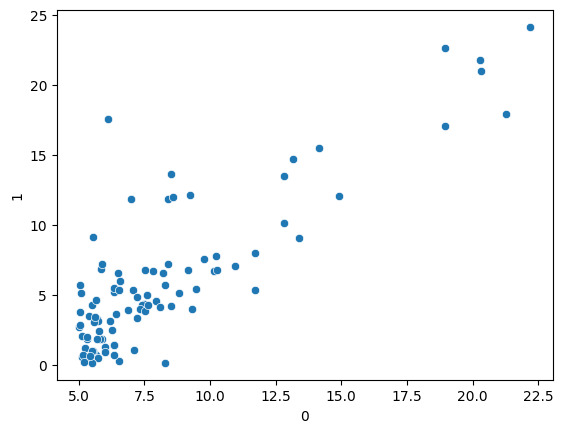

In [5]:
# Graficar los datos
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame 'df' con columnas 'x' e 'y'
sns.scatterplot(data=df,x=0, y=1)
plt.show()

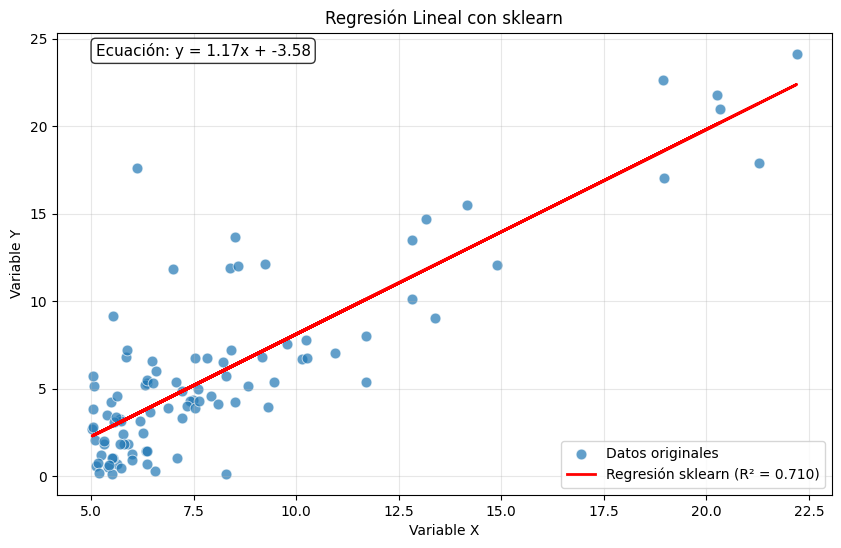

In [6]:
# Entrenar el modelo

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Tu modelo
X = df[[0]]
y = df[1]
reg = LinearRegression().fit(X, y)
r2_score = reg.score(X, y)

# Obtener predicciones
y_pred = reg.predict(X)

# Graficar
plt.figure(figsize=(10, 6))

# Puntos originales
sns.scatterplot(data=df, x=0, y=1, alpha=0.7, s=60, label='Datos originales')

# Tu línea de regresión de sklearn
plt.plot(df[0], y_pred, color='red', linewidth=2, 
         label=f'Regresión sklearn (R² = {r2_score:.3f})')

# Información adicional
plt.text(0.05, 0.95, 
         f'Ecuación: y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}', 
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title('Regresión Lineal con sklearn')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Desempeño del modelo de regresión

#### Error Cuadrático Medio (MSE)

El **Error Cuadrático Medio (MSE)**, es una medida cuantitativa muy usada para medir el desempeño de un modelo de regresión.

$$J(W) = \frac{1}{N}\sum\limits_{i=1}^{n}(y^{(i)} - \hat{y}^{(i)})^2$$


Para obtener el **MSE** puede utilizar la función `mean_squared_error` del módulo [metrics de scikit-learn](https://scikit-learn.org/stable/api/sklearn.metrics.html).

Valores de **MSE** cercanos a 0, indican mejor desempeño. 

## Coeficiente de determinación $(R^2)$

En algunos casos, es más útil reportar el **coeficiente de determinación** $(R^2)$, el cual puede ser entendido como una comparación entre el error del modelo y el error de usar siempre la media de $y$ como predicción.

El **coeficiente de determinación** $R^2$ mide la fracción de la de la **variabilidad de la variable objetivo** que el modelo logra explicar.

$$
R^2 = 1 - \frac{\displaystyle\sum_{i=1}^N (y^{(i)} - \hat y^{(i)})^2}{\displaystyle\sum_{i=1}^N (y^{(i)} - \mu_y)^2}
= 1 - \frac{\mathrm{SSE}}{\mathrm{SST}}
$$

donde:

* $\mu_y$ es la media de los $y$ reales.
* SSE (Sum of Squared Errors) = error del modelo.
* SST (Total Sum of Squares) = variabilidad total de los datos.


#### Interpretación

* $R^2 = 1$: el modelo **explica toda la variabilidad** (ajuste perfecto).
* $0 < R^2 < 1$: explica parte de la variabilidad; cuanto más cerca de 1, **mejor**.
* $R^2 = 0$: no es mejor que predecir siempre la media $\mu_y$.
* $R^2 < 0$: **peor** que usar la media; puede ocurrir en datos de prueba si el modelo **no generaliza**.

En entrenamiento, $R^2$ siempre queda en $[0,1]$. En test, al evaluar sobre datos distintos, la relación SSE/SST puede superar 1 y hacer $R^2$ **negativo**.

Para obtener el coeficiente de determinación puede utilizar la función `r2_score` del módulo metrics de scikit-learn.

### Actividad 2

Obtenga el rango de los valores a predecir (mínimo y máximo precios) de la actividad anterior, calcule el MSE sobre los datos de entrenamiento y analice si el resultado obtenido es satisfactorio o no.

In [7]:
from sklearn.metrics import mean_squared_error

# cálculo del error cuadrático medio sobre las predicciones de entrenamiento

MSE = mean_squared_error(df[1], y_pred)
print(MSE)

8.292509158819916


Calcule el coeficiente de determinación

In [8]:
from sklearn.metrics import r2_score

# cálculo del coeficiente de determinación R^2 sobre las predicciones de entrenamiento

R2 = r2_score(df[1], y_pred)
print(R2)

0.7097887739964922


# Regresión Polinomial

La regresión es no lineal si las variables de entrada, en el modelo de regresión, son modificadas por alguna función (cuadrática, logarítmica, etc). En el caso particular donde se elevan las variables de entrada a alguna potencia, se conoce como regresión polinomial.

En regresión lineal simple, el modelo es:

$$
\hat{y} = w_0 + w_1 x
$$

En regresión polinomial de grado 3, por ejemplo, el modelo sería:

$$
\hat{y} = w_0 + w_1 x + w_2 x^2 + w_3 x^3
$$

Este modelo sigue siendo **lineal respecto a los parámetros** $w_i$, por lo tanto:

> Se puede entrenar igual que una regresión simple, solo que debemos **expandir `x`** a una matriz de **características polinomiales**.

Sea un conjunto de entradas escalares $x_i$ y deseamos ajustar un modelo polinomial de grado $d$. 

Se construye la **matriz** $\mathbf{X}_{\text{pol}}$

$$
\mathbf{X}_{\text{pol}} =
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^d \\
1 & x_2 & x_2^2 & \cdots & x_2^d \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1& x_n & x_n^2 & \cdots & x_n^d \\
\end{bmatrix}
$$

De modo que el modelo es:
$$
\hat{y} = \mathbf{X}_{\text{pol}} \cdot \boldsymbol{W}
$$
En otras palabras, la transformación es:

$$
x \in \mathbb{R}^{(n,1)} \quad \longrightarrow \quad X_\text{poly} \in \mathbb{R}^{(n,d+1)}
$$


$$
x \in \mathbb{R}^{(n, 1)} \quad \longrightarrow \quad X_{\text{poly}} = [1, x, x^2, x^3, ..., x^d] \in \mathbb{R}^{(n, d+1)}
$$


### Actividad 3: Regresión polinómica con validación cruzada

1. Cargue los datos del archivo `data_3.csv`. El archivo tiene dos columnas:
    - `X` (variable independiente).
    - `Y` (variable dependiente).
2. Visualice los datos con un gráfico de dispersión (`scatter`).
3. Para cada grado polinómico $d = 1, 2, 3, 4, 5, 6, 10$:
    
    a. Genere las características polinómicas con [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).
    
    b. Cree un modelo de regresión lineal (`LinearRegression`).
    
    c. Evalúe el modelo usando **validación cruzada** con 5 particiones (`cross_val_score` con `cv=5`).
    
    d. Calcule el promedio del **Error Cuadrático Medio (MSE)** y del **coeficiente de determinación $R^2$** sobre los folds.
    
4. Arme una tabla que muestre, para cada grado polinómico, los valores promedios de MSE y $R^2$.
5. **Discuta:**
    - ¿Qué grado parece ofrecer el mejor equilibrio entre simplicidad y desempeño?
    - ¿Qué ventajas tiene usar validación cruzada en lugar de un único train/test split?
    - ¿Qué evidencias de **underfitting** y **overfitting** aparecen en los resultados?

<Axes: xlabel='X', ylabel='Y'>

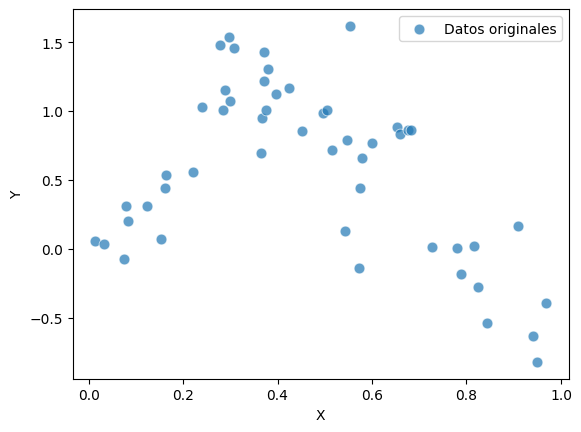

In [9]:
# Módulos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

datos = pd.read_csv('1_datos/data_3.csv')

# visualizamos la informacion
# Puntos originales
sns.scatterplot(data=datos, x="X", y="Y", alpha=0.7, s=60, label='Datos originales')


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos

X = datos[['X']].values
y = datos['Y'].values

# Configurar validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grados = [1, 2, 3, 4, 5, 6, 10]
resultados = []

# Evaluar cada grado polinómico
for d in grados:
    mse_scores = []
    r2_scores = []
    
    for train_idx, test_idx in kf.split(X):
        # Dividir datos
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Escalar (fit en train, transform en test)
        scaler_X = StandardScaler()
        scaler_y = StandardScaler()
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_test_scaled = scaler_X.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
        y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()
        
        # Transformación polinómica
        poly = PolynomialFeatures(degree=d)
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_test_poly = poly.transform(X_test_scaled)
        
        # Entrenar y evaluar
        modelo = LinearRegression()
        modelo.fit(X_train_poly, y_train_scaled)
        y_pred = modelo.predict(X_test_poly)
        
        mse_scores.append(mean_squared_error(y_test_scaled, y_pred))
        r2_scores.append(r2_score(y_test_scaled, y_pred))
    
    # Promediar métricas
    resultados.append({
        'Grado': d,
        'MSE promedio': np.mean(mse_scores),
        'R² promedio': np.mean(r2_scores)
    })

# Mostrar resultados
tabla = pd.DataFrame(resultados)
print(tabla.to_string(index=False))

 Grado  MSE promedio  R² promedio
     1      0.959807    -0.057657
     2      0.364039     0.613534
     3      0.325361     0.657037
     4      0.341582     0.644728
     5      0.330077     0.662616
     6      0.349053     0.613388
    10      0.676896     0.289355


1. ¿Qué grado ofrece el mejor equilibrio entre simplicidad y desempeño?

    Respuesta: Grado 3  
    Justificación:  
    Grado 3: R² = 0.657, MSE = 0.325  
    Grado 5: R² = 0.663, MSE = 0.330 (ligeramente mejor)  

2. Ventajas de usar validación cruzada vs train/test split único

    Estimación más confiable: Reduce la varianza del error al promediar múltiples evaluaciones  
    Uso eficiente de datos: Con solo 50 observaciones, no "desperdiciar" 10 en un test único  
    Detección de inestabilidad: Si el modelo varía mucho entre folds → señal de problemas  
    Menor sesgo: No depende de una partición afortunada/desafortunada  

3. Evidencias de Underfitting y Overfitting
    
    Grado 1: R² = -0.058  
    R² negativo: El modelo es peor que predecir simplemente el promedio de Y  
    MSE alto (0.96): Errores de predicción grandes  
    Modelo demasiado simple: Una línea recta no puede capturar la relación no lineal  

# Regresión Polinomial con Regularización

La regularización es una técnica que penaliza valores grandes en los parámetros del modelo para evitar sobreajuste y favorecer modelos más simples y estables.

## L2 (Ridge)

Agrega una penalización proporcional al **cuadrado de los pesos**:

$$
\mathcal{L}_{\text{L2}} = \text{MSE} + \lambda \sum_{j=1}^d w_j^2
$$

* Favorece pesos pequeños pero no exactamente cero.
* Se mantiene la mayoría de los términos de los pesos.

##  L1 (Lasso)

Agrega una penalización proporcional al **valor absoluto de los pesos**:

$$
\mathcal{L}_{\text{L1}} = \text{MSE} + \lambda \sum_{j=1}^d |w_j|
$$

* Tiende a hacer **algunos pesos exactamente cero** (selección automática de características).
* Útil cuando hay muchas features irrelevantes.

### Actividad 4: Regularización L2 y L1 con sklearn

Experimentar con modelos de regresión polinomial de distintos grados, comparando su capacidad de generalización:

- **sin regularización** y  + **Ridge**
- **sin regularización** y  + **Lasso**

visualizar en ambos casos, cómo las penalizaciones L2 y L1 controlan el sobreajuste.

Utilizar el dataset proporcionado en `data_7.mat`, que contiene:

* **X\_train**, **y\_train**: datos de entrenamiento
* **X\_val**,  **y\_val**


- Utilizar `LinearRegression` con Polynomial Features. Nota: La estandarización después de expandir a polinomios es importante para que la regularización funcione bien.
- Búsqueda de hiperparámetros:
   - Probar para distintos grados de polinomios d = [1,3,5,7,9,11,13,15]
   - Regularización, use una grilla de valores, p. ej. $\lambda$ = {1e-4, 1e-3, …, 1e2}.
   - Para L1 y L2 elegir la combinación (d, $\lambda$) que maximice $R^2$ en el conjunto de validación.


Regresión polinomial con [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) (L2).
Regresión polinomial con [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (L1).

Modelos finales y evaluación

- Con los hiperparámetros elegidos (d, $\lambda$) para cada método:
   - Entrene en todo el conjunto de entrenamiento (X, y).
   - Evalúe en validación (Xval, yval) y reporte MSE y $R^2$
   - Grafique: datos (X, y) y las curvas ajustadas (curva sin regularización y con regularización) en gráficos separados para L1 y L2. 
- Compare Ridge vs Lasso:
   - ¿Cuál generaliza mejor?
   - ¿Cómo se ven los coeficientes? (en Lasso algunos pueden quedar exactamente en cero).

In [12]:
import scipy.io
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# Cargar los datos

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# ============================================================
# 1. CARGAR DATOS
# ============================================================
data = loadmat('1_datos/data_7.mat')

print("Variables disponibles en el archivo:")
for key in data.keys():
    if not key.startswith('__'):  # Ignorar metadatos
        print(f"  - {key}: shape = {data[key].shape}")
        
        
X_train = data['X']    
y_train = data['y'].ravel()   
X_val = data['Xval']    
y_val = data['yval'].ravel()     

print(f"Datos de entrenamiento: {X_train.shape[0]} observaciones")
print(f"Datos de validación: {X_val.shape[0]} observaciones\n")


Variables disponibles en el archivo:
  - X: shape = (50, 1)
  - y: shape = (50, 1)
  - Xval: shape = (30, 1)
  - yval: shape = (30, 1)
Datos de entrenamiento: 50 observaciones
Datos de validación: 30 observaciones



In [18]:
# ============================================================
# 2. BÚSQUEDA DE HIPERPARÁMETROS
# ============================================================
grados = [1, 3, 5, 7, 9, 11, 13, 15]
lambdas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# Almacenar resultados
resultados_ridge = []
resultados_lasso = []

print("Buscando mejores hiperparámetros...")
print("=" * 70)

for d in grados:
    for lam in lambdas:
        # Crear características polinómicas
        poly = PolynomialFeatures(degree=d)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)
        
        # IMPORTANTE: Estandarizar después de expandir a polinomios
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_poly)
        X_val_scaled = scaler.transform(X_val_poly)
        
        # Ridge (L2)
        ridge = Ridge(alpha=lam)
        ridge.fit(X_train_scaled, y_train)
        y_pred_ridge = ridge.predict(X_val_scaled)
        r2_ridge = r2_score(y_val, y_pred_ridge)
        mse_ridge = mean_squared_error(y_val, y_pred_ridge)
        
        resultados_ridge.append({
            'grado': d,
            'lambda': lam,
            'R2': r2_ridge,
            'MSE': mse_ridge
        })
        
        # Lasso (L1)
        lasso = Lasso(alpha=lam, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        y_pred_lasso = lasso.predict(X_val_scaled)
        r2_lasso = r2_score(y_val, y_pred_lasso)
        mse_lasso = mean_squared_error(y_val, y_pred_lasso)
        
        resultados_lasso.append({
            'grado': d,
            'lambda': lam,
            'R2': r2_lasso,
            'MSE': mse_lasso
        })

# Convertir a DataFrames
df_ridge = pd.DataFrame(resultados_ridge)
df_lasso = pd.DataFrame(resultados_lasso)

# Encontrar mejores hiperparámetros
mejor_ridge = df_ridge.loc[df_ridge['R2'].idxmax()]
mejor_lasso = df_lasso.loc[df_lasso['R2'].idxmax()]

print("\n🏆 MEJORES HIPERPARÁMETROS")
print("=" * 70)
print(f"\nRIDGE (L2):")
print(f"  Grado: {int(mejor_ridge['grado'])}")
print(f"  Lambda: {mejor_ridge['lambda']}")
print(f"  R² validación: {mejor_ridge['R2']:.6f}")
print(f"  MSE validación: {mejor_ridge['MSE']:.6f}")

print(f"\nLASSO (L1):")
print(f"  Grado: {int(mejor_lasso['grado'])}")
print(f"  Lambda: {mejor_lasso['lambda']}")
print(f"  R² validación: {mejor_lasso['R2']:.6f}")
print(f"  MSE validación: {mejor_lasso['MSE']:.6f}")

Buscando mejores hiperparámetros...


c:\Users\Pc\Desktop\TUPED\Aprendizaje Automatico\Practica\Semana III\AM_Regresion\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+01, tolerance: 8.994e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pc\Desktop\TUPED\Aprendizaje Automatico\Practica\Semana III\AM_Regresion\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.488e+01, tolerance: 8.994e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pc\Desktop\TUPED\Aprendizaje Automatico\Practica\Semana III\AM_Regresion\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning


🏆 MEJORES HIPERPARÁMETROS

RIDGE (L2):
  Grado: 13
  Lambda: 10.0
  R² validación: 0.893423
  MSE validación: 4.200298

LASSO (L1):
  Grado: 9
  Lambda: 0.1
  R² validación: 0.895692
  MSE validación: 4.110885


In [19]:
# ============================================================
# 3. ENTRENAR MODELOS FINALES
# ============================================================
# Sin regularización
d_ridge = int(mejor_ridge['grado'])
poly_sin_reg = PolynomialFeatures(degree=d_ridge)
X_train_poly = poly_sin_reg.fit_transform(X_train)
X_val_poly = poly_sin_reg.transform(X_val)
scaler_sin_reg = StandardScaler()
X_train_scaled = scaler_sin_reg.fit_transform(X_train_poly)
X_val_scaled = scaler_sin_reg.transform(X_val_poly)

modelo_sin_reg = LinearRegression()
modelo_sin_reg.fit(X_train_scaled, y_train)
y_pred_sin_reg = modelo_sin_reg.predict(X_val_scaled)

# Ridge con mejores hiperparámetros
poly_ridge = PolynomialFeatures(degree=d_ridge)
X_train_poly_ridge = poly_ridge.fit_transform(X_train)
X_val_poly_ridge = poly_ridge.transform(X_val)
scaler_ridge = StandardScaler()
X_train_scaled_ridge = scaler_ridge.fit_transform(X_train_poly_ridge)
X_val_scaled_ridge = scaler_ridge.transform(X_val_poly_ridge)

modelo_ridge = Ridge(alpha=mejor_ridge['lambda'])
modelo_ridge.fit(X_train_scaled_ridge, y_train)
y_pred_ridge_final = modelo_ridge.predict(X_val_scaled_ridge)

# Lasso con mejores hiperparámetros
d_lasso = int(mejor_lasso['grado'])
poly_lasso = PolynomialFeatures(degree=d_lasso)
X_train_poly_lasso = poly_lasso.fit_transform(X_train)
X_val_poly_lasso = poly_lasso.transform(X_val)
scaler_lasso = StandardScaler()
X_train_scaled_lasso = scaler_lasso.fit_transform(X_train_poly_lasso)
X_val_scaled_lasso = scaler_lasso.transform(X_val_poly_lasso)

poly_sin_reg_lasso = PolynomialFeatures(degree=d_lasso)
X_train_poly_sin_lasso = poly_sin_reg_lasso.fit_transform(X_train)
X_val_poly_sin_lasso = poly_sin_reg_lasso.transform(X_val)
scaler_sin_reg_lasso = StandardScaler()
X_train_scaled_sin_lasso = scaler_sin_reg_lasso.fit_transform(X_train_poly_sin_lasso)
X_val_scaled_sin_lasso = scaler_sin_reg_lasso.transform(X_val_poly_sin_lasso)

modelo_sin_reg_lasso = LinearRegression()
modelo_sin_reg_lasso.fit(X_train_scaled_sin_lasso, y_train)
y_pred_sin_reg_lasso = modelo_sin_reg_lasso.predict(X_val_scaled_sin_lasso)

modelo_lasso = Lasso(alpha=mejor_lasso['lambda'], max_iter=10000)
modelo_lasso.fit(X_train_scaled_lasso, y_train)
y_pred_lasso_final = modelo_lasso.predict(X_val_scaled_lasso)

In [20]:
# ============================================================
# 4. EVALUACIÓN FINAL
# ============================================================
print("\n\n📊 EVALUACIÓN EN VALIDACIÓN")
print("=" * 70)

print("\nSin Regularización (grado {}):".format(d_ridge))
print(f"  MSE: {mean_squared_error(y_val, y_pred_sin_reg):.6f}")
print(f"  R²: {r2_score(y_val, y_pred_sin_reg):.6f}")

print("\nRidge (L2):")
print(f"  MSE: {mean_squared_error(y_val, y_pred_ridge_final):.6f}")
print(f"  R²: {r2_score(y_val, y_pred_ridge_final):.6f}")

print("\nSin Regularización (grado {}):".format(d_lasso))
print(f"  MSE: {mean_squared_error(y_val, y_pred_sin_reg_lasso):.6f}")
print(f"  R²: {r2_score(y_val, y_pred_sin_reg_lasso):.6f}")

print("\nLasso (L1):")
print(f"  MSE: {mean_squared_error(y_val, y_pred_lasso_final):.6f}")
print(f"  R²: {r2_score(y_val, y_pred_lasso_final):.6f}")

# ============================================================
# 5. ANÁLISIS DE COEFICIENTES
# ============================================================
print("\n\n🔍 ANÁLISIS DE COEFICIENTES")
print("=" * 70)

n_coef_ridge = np.sum(np.abs(modelo_ridge.coef_) > 1e-10)
n_coef_lasso = np.sum(np.abs(modelo_lasso.coef_) > 1e-10)
n_zeros_lasso = np.sum(np.abs(modelo_lasso.coef_) <= 1e-10)

print(f"\nRidge (L2):")
print(f"  Total de coeficientes: {len(modelo_ridge.coef_)}")
print(f"  Coeficientes no nulos: {n_coef_ridge}")
print(f"  Rango de valores: [{modelo_ridge.coef_.min():.4f}, {modelo_ridge.coef_.max():.4f}]")

print(f"\nLasso (L1):")
print(f"  Total de coeficientes: {len(modelo_lasso.coef_)}")
print(f"  Coeficientes no nulos: {n_coef_lasso}")
print(f"  Coeficientes en cero: {n_zeros_lasso} ({100*n_zeros_lasso/len(modelo_lasso.coef_):.1f}%)")
print(f"  Rango de valores: [{modelo_lasso.coef_.min():.4f}, {modelo_lasso.coef_.max():.4f}]")



📊 EVALUACIÓN EN VALIDACIÓN

Sin Regularización (grado 13):
  MSE: 167.256281
  R²: -3.243891

Ridge (L2):
  MSE: 4.200298
  R²: 0.893423

Sin Regularización (grado 9):
  MSE: 29.096841
  R²: 0.261709

Lasso (L1):
  MSE: 4.110885
  R²: 0.895692


🔍 ANÁLISIS DE COEFICIENTES

Ridge (L2):
  Total de coeficientes: 14
  Coeficientes no nulos: 13
  Rango de valores: [-0.4383, 4.4814]

Lasso (L1):
  Total de coeficientes: 10
  Coeficientes no nulos: 5
  Coeficientes en cero: 5 (50.0%)
  Rango de valores: [-2.1574, 8.6458]


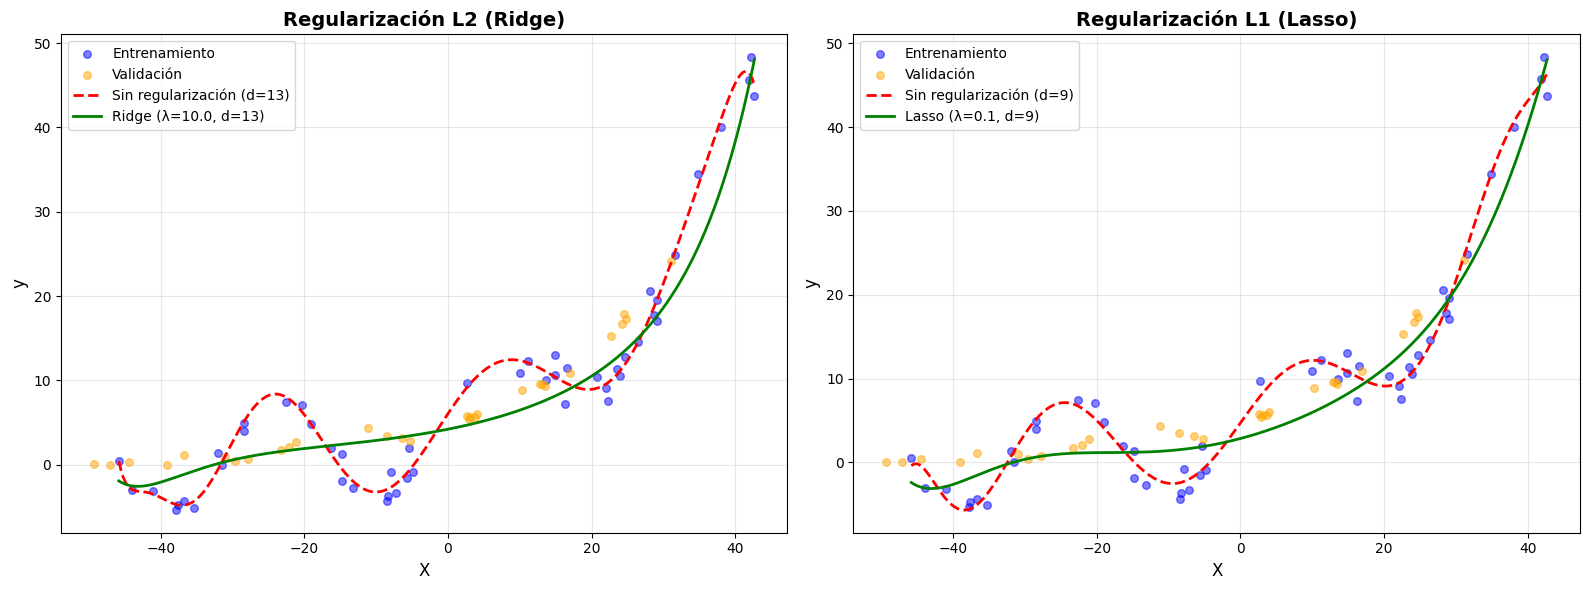



⚖️ COMPARACIÓN RIDGE vs LASSO

✅ Lasso generaliza mejor:
   Lasso R²: 0.895692
   Ridge R²: 0.893423
   Diferencia: 0.002269

📌 Características clave:
   - Lasso elimina 5 características (selección automática)
   - Ridge mantiene todas las características pero las penaliza
   - Lasso es más interpretable con 5 coeficientes activos


In [21]:
# ============================================================
# 6. VISUALIZACIÓN
# ============================================================
# Generar datos para curvas suaves
X_plot = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)

# Ridge
X_plot_poly_ridge = poly_ridge.transform(X_plot)
X_plot_scaled_ridge = scaler_ridge.transform(X_plot_poly_ridge)
y_plot_sin_reg = modelo_sin_reg.predict(scaler_sin_reg.transform(poly_sin_reg.transform(X_plot)))
y_plot_ridge = modelo_ridge.predict(X_plot_scaled_ridge)

# Lasso
X_plot_poly_lasso = poly_lasso.transform(X_plot)
X_plot_scaled_lasso = scaler_lasso.transform(X_plot_poly_lasso)
y_plot_sin_reg_lasso = modelo_sin_reg_lasso.predict(scaler_sin_reg_lasso.transform(poly_sin_reg_lasso.transform(X_plot)))
y_plot_lasso = modelo_lasso.predict(X_plot_scaled_lasso)

# Crear gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Ridge (L2)
ax1.scatter(X_train, y_train, alpha=0.5, s=30, label='Entrenamiento', color='blue')
ax1.scatter(X_val, y_val, alpha=0.5, s=30, label='Validación', color='orange')
ax1.plot(X_plot, y_plot_sin_reg, 'r--', linewidth=2, 
         label=f'Sin regularización (d={d_ridge})')
ax1.plot(X_plot, y_plot_ridge, 'g-', linewidth=2, 
         label=f'Ridge (λ={mejor_ridge["lambda"]}, d={d_ridge})')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Regularización L2 (Ridge)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Lasso (L1)
ax2.scatter(X_train, y_train, alpha=0.5, s=30, label='Entrenamiento', color='blue')
ax2.scatter(X_val, y_val, alpha=0.5, s=30, label='Validación', color='orange')
ax2.plot(X_plot, y_plot_sin_reg_lasso, 'r--', linewidth=2, 
         label=f'Sin regularización (d={d_lasso})')
ax2.plot(X_plot, y_plot_lasso, 'g-', linewidth=2, 
         label=f'Lasso (λ={mejor_lasso["lambda"]}, d={d_lasso})')
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('Regularización L1 (Lasso)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# 7. COMPARACIÓN FINAL
# ============================================================
print("\n\n⚖️ COMPARACIÓN RIDGE vs LASSO")
print("=" * 70)

if mejor_ridge['R2'] > mejor_lasso['R2']:
    print(f"\n✅ Ridge generaliza mejor:")
    print(f"   Ridge R²: {mejor_ridge['R2']:.6f}")
    print(f"   Lasso R²: {mejor_lasso['R2']:.6f}")
    print(f"   Diferencia: {mejor_ridge['R2'] - mejor_lasso['R2']:.6f}")
else:
    print(f"\n✅ Lasso generaliza mejor:")
    print(f"   Lasso R²: {mejor_lasso['R2']:.6f}")
    print(f"   Ridge R²: {mejor_ridge['R2']:.6f}")
    print(f"   Diferencia: {mejor_lasso['R2'] - mejor_ridge['R2']:.6f}")

print(f"\n📌 Características clave:")
print(f"   - Lasso elimina {n_zeros_lasso} características (selección automática)")
print(f"   - Ridge mantiene todas las características pero las penaliza")
print(f"   - Lasso es más interpretable con {n_coef_lasso} coeficientes activos")